In [38]:
import pandas as pd
import scipy as sc
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [39]:
df  = pd.read_csv('Toyota.csv')
df.head(5)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [40]:
df.shape

(1436, 11)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1436 non-null   int64  
 1   Price       1436 non-null   int64  
 2   Age         1336 non-null   float64
 3   KM          1436 non-null   object 
 4   FuelType    1336 non-null   object 
 5   HP          1436 non-null   object 
 6   MetColor    1286 non-null   float64
 7   Automatic   1436 non-null   int64  
 8   CC          1436 non-null   int64  
 9   Doors       1436 non-null   object 
 10  Weight      1436 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 123.5+ KB


In [42]:
df.isna().sum()

Unnamed: 0      0
Price           0
Age           100
KM              0
FuelType      100
HP              0
MetColor      150
Automatic       0
CC              0
Doors           0
Weight          0
dtype: int64

In [43]:
df.dropna(axis=0 ,how = "any",inplace= True)

In [44]:
df.isna().sum()

Unnamed: 0    0
Price         0
Age           0
KM            0
FuelType      0
HP            0
MetColor      0
Automatic     0
CC            0
Doors         0
Weight        0
dtype: int64

In [45]:
df.shape

(1111, 11)

In [46]:
df.describe()

,Unnamed: 0,Price,Age,MetColor,Automatic,CC,Weight
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,707.868587,10774.997300,55.585959,0.675068,0.053105,1569.463546,1073.870387
std,414.023750,3699.695538,18.829188,0.468561,0.224344,185.935691,52.610513
min,0.000000,4350.000000,1.000000,0.000000,0.000000,1300.000000,1000.000000
25%,347.500000,8450.000000,43.000000,0.000000,0.000000,1400.000000,1045.000000
50%,703.000000,9900.000000,60.000000,1.000000,0.000000,1600.000000,1070.000000
75%,1069.500000,11950.000000,70.000000,1.000000,0.000000,1600.000000,1090.000000
max,1435.000000,31275.000000,80.000000,1.000000,1.000000,2000.000000,1615.000000


In [47]:
q1,q3 = np.percentile(df['Age'],[25,75])
iqr = q3-q1
lower = q1 -(1.5*iqr)
upper = q3 +(1.5*iqr)

cleaned = df[(df['Age']>=lower) & (df['Age']<=upper)]

In [48]:
df.shape

(1111, 11)

In [49]:
df.columns

Index(['Unnamed: 0', 'Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor',
       'Automatic', 'CC', 'Doors', 'Weight'],
      dtype='object')

In [50]:
df.nunique()

Unnamed: 0    1111
Price          213
Age             76
KM             991
FuelType         3
HP              13
MetColor         2
Automatic        2
CC              11
Doors            7
Weight          57
dtype: int64

In [51]:
df["FuelType"].value_counts()

FuelType
Petrol    979
Diesel    120
CNG        12
Name: count, dtype: int64

ORDINAL ENCODER

In [52]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder
pm = ["Petrol","Diesel","CNG"]
e1 = OrdinalEncoder(categories = [pm])

In [53]:
df["FuelType"] = e1.fit_transform(df[["FuelType"]])

In [54]:
df

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015


Label Encoder

In [55]:
le = LabelEncoder()
dff = df.copy()
dff

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015


In [56]:
dff['FuelType']=le.fit_transform(dff['FuelType'])
dff

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0,86,0.0,0,1300,3,1015


One hot encoder

In [57]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
enc = pd.DataFrame(ohe.fit_transform(dff[['FuelType']]))
enc

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1106,1.0,0.0,0.0
1107,1.0,0.0,0.0
1108,1.0,0.0,0.0
1109,1.0,0.0,0.0


Binary Encoder

In [58]:
from category_encoders import BinaryEncoder
dfb = df.copy()
dfb

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015


In [59]:
be = BinaryEncoder()
nd = be.fit_transform(df['FuelType'])
dfb = pd.concat([df,nd],axis = 1)
dfb

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,FuelType
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,1165,1.0
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,1165,1.0
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,1165,1.0
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,1170,1.0
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,1170,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,1000,0.0
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,1065,0.0
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,1015,0.0
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,1015,0.0


In [60]:
df["FuelType"].value_counts()

FuelType
0.0    979
1.0    120
2.0     12
Name: count, dtype: int64

Minmax scaller

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
dfm = df.copy()
dfm

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,0.268293
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,0.268293
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,0.268293
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,0.276423
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,0.276423
...,...,...,...,...,...,...,...,...,...,...,...
1425,1425,7950,80.0,??,0.0,86,1.0,0,1300,4,0.000000
1429,1429,8950,78.0,24000,0.0,86,1.0,1,1300,5,0.105691
1430,1430,8450,80.0,23000,0.0,86,0.0,0,1300,3,0.024390
1432,1432,10845,72.0,??,0.0,86,0.0,0,1300,3,0.024390


In [67]:
scaler = MinMaxScaler()
dfm[['Weight']]= scaler.fit_transform(dfm[['Weight']])
dfm.head(5)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1.0,90,1.0,0,2000,three,0.268293
1,1,13750,23.0,72937,1.0,90,1.0,0,2000,3,0.268293
3,3,14950,26.0,48000,1.0,90,0.0,0,2000,3,0.268293
4,4,13750,30.0,38500,1.0,90,0.0,0,2000,3,0.276423
5,5,12950,32.0,61000,1.0,90,0.0,0,2000,3,0.276423


Normalizer

In [70]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
df[['Weight']]= scaler.fit_transform(df[["Weight"]])
df[['Weight']]

,Weight
0,1.0
1,1.0
3,1.0
4,1.0
5,1.0
...,...
1425,0.0
1429,1.0
1430,1.0
1432,1.0


In [71]:
df[["Weight"]].skew()

Weight   -8.750807
dtype: float64

Standard scaler

In [72]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
dfm [['Age']]=sc.fit_transform(dfm[['Age']])
dfm.head(5)

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,-1.731388,46986,1.0,90,1.0,0,2000,three,0.268293
1,1,13750,-1.731388,72937,1.0,90,1.0,0,2000,3,0.268293
3,3,14950,-1.571989,48000,1.0,90,0.0,0,2000,3,0.268293
4,4,13750,-1.359458,38500,1.0,90,0.0,0,2000,3,0.276423
5,5,12950,-1.253192,61000,1.0,90,0.0,0,2000,3,0.276423


In [73]:
dfm[['Age']].skew()

Age   -0.80797
dtype: float64

In [74]:
import statsmodels.api as sm

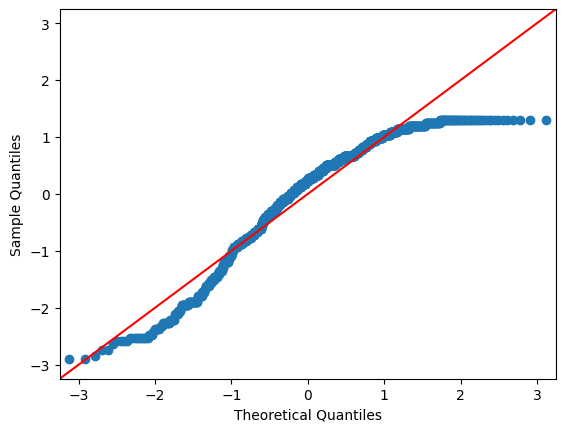

In [75]:
sm.qqplot(dfm['Age'],line='45')
plt.show()

In [76]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution="normal")


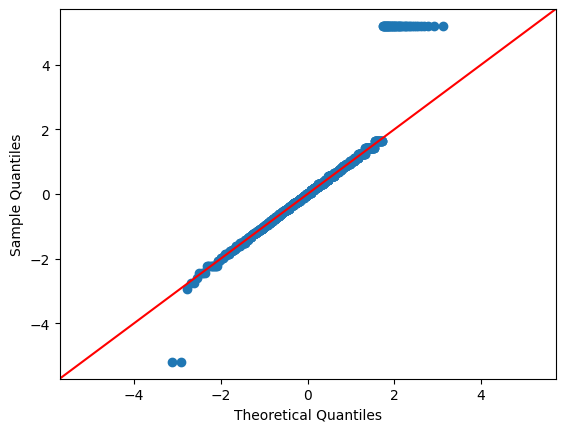

In [77]:
dfm["Age"]= qt.fit_transform(df[["Age"]])

sm.qqplot(dfm["Age"],line='45')
plt.show()